In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2016.csv
/kaggle/input/world-happiness/2015.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
data_15 = pd.read_csv('/kaggle/input/world-happiness/2015.csv')
data_16 = pd.read_csv('/kaggle/input/world-happiness/2016.csv')
data_17 = pd.read_csv('/kaggle/input/world-happiness/2015.csv')

In [3]:
data_15.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [4]:
data_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [5]:
data_15.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
data_16.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [7]:
data_17.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


The standard error seems not to be big so drop it
Should do another one w/ standard deviation if there is more accuracy

In [8]:
data_15.drop(['Standard Error'],axis=1,inplace=True)
data_17.drop(['Standard Error'],axis=1,inplace=True)


In [9]:
data_16.drop(['Lower Confidence Interval','Upper Confidence Interval'],axis=1,inplace=True)

In [10]:
data_15.describe()


,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [11]:
data_16.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [12]:
data_17.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


There seems to be not much change in the mean happiness of the world over time

In [13]:
data = pd.concat([data_15,data_16,data_17])
data.rename(columns={'Economy (GDP per Capita)':'GDP/Capita'},inplace=True)

In [14]:
data.describe()

,Happiness Rank,Happiness Score,GDP/Capita,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000
mean,79.323467,5.377875,0.881900,0.925516,0.606148,0.409489,0.141497,0.239068,2.174267
std,45.562667,1.141482,0.408597,0.285522,0.243248,0.151136,0.116908,0.128826,0.558972
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.000000,4.514000,0.590660,0.771150,0.433720,0.309530,0.061370,0.150110,1.863990
50%,79.000000,5.268000,0.953950,0.974590,0.650880,0.416910,0.106130,0.217470,2.188960
75%,119.000000,6.269000,1.208060,1.126900,0.790810,0.532060,0.179220,0.311050,2.517380
max,158.000000,7.587000,1.824270,1.402230,1.025250,0.669730,0.551910,0.819710,3.837720


In [15]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,GDP/Capita,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [16]:
data['Country'].nunique()

164

In [17]:
data.groupby('Region').mean().sort_values(by='Happiness Score',ascending=False)

,Happiness Rank,Happiness Score,GDP/Capita,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,
Australia and New Zealand,9.166667,7.297833,1.328768,1.255890,0.893670,0.621847,0.385588,0.464890,2.347242
North America,9.833333,7.266667,1.398285,1.213893,0.856907,0.568892,0.239818,0.429572,2.559402
Western Europe,29.412698,6.688302,1.338082,1.179019,0.881350,0.525813,0.231823,0.302977,2.229316
Latin America and Caribbean,47.411765,6.129529,0.917966,1.031913,0.671694,0.475236,0.113235,0.214484,2.704989
Eastern Asia,65.388889,5.625500,1.193624,1.036427,0.853819,0.437421,0.124579,0.225111,1.754632
Middle East and Northern Africa,77.762712,5.400186,1.090273,0.848082,0.676897,0.345011,0.175205,0.189208,2.075546
Central and Eastern Europe,78.816092,5.345517,0.977471,0.989313,0.689713,0.339022,0.087140,0.158475,2.104340
Southeastern Asia,80.814815,5.324593,0.824830,0.890897,0.638694,0.534777,0.150219,0.428224,1.856983
Southern Asia,112.666667,4.575000,0.593881,0.590446,0.511777,0.365567,0.103323,0.342046,2.067880


In [18]:
data.groupby('Region').mean().sort_values(by='Happiness Rank')

,Happiness Rank,Happiness Score,GDP/Capita,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,
Australia and New Zealand,9.166667,7.297833,1.328768,1.255890,0.893670,0.621847,0.385588,0.464890,2.347242
North America,9.833333,7.266667,1.398285,1.213893,0.856907,0.568892,0.239818,0.429572,2.559402
Western Europe,29.412698,6.688302,1.338082,1.179019,0.881350,0.525813,0.231823,0.302977,2.229316
Latin America and Caribbean,47.411765,6.129529,0.917966,1.031913,0.671694,0.475236,0.113235,0.214484,2.704989
Eastern Asia,65.388889,5.625500,1.193624,1.036427,0.853819,0.437421,0.124579,0.225111,1.754632
Middle East and Northern Africa,77.762712,5.400186,1.090273,0.848082,0.676897,0.345011,0.175205,0.189208,2.075546
Central and Eastern Europe,78.816092,5.345517,0.977471,0.989313,0.689713,0.339022,0.087140,0.158475,2.104340
Southeastern Asia,80.814815,5.324593,0.824830,0.890897,0.638694,0.534777,0.150219,0.428224,1.856983
Southern Asia,112.666667,4.575000,0.593881,0.590446,0.511777,0.365567,0.103323,0.342046,2.067880


It is not surprising that Western countries are on the top rank of hapiness. But is this because there are more data of the one country than another. Like the # of countries in Asia are bigger than ones of Western region

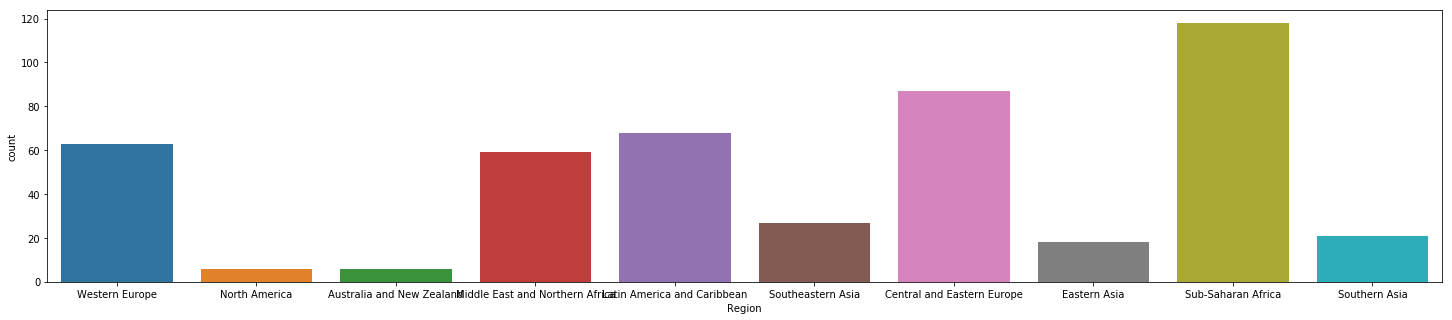

In [19]:
plt.figure(figsize=(25,5))
sns.countplot('Region',data=data )

Let's compare the number of countries in each region and that region's happiness rank

In [20]:
data[['Region','Happiness Rank']].groupby('Region').aggregate(['count', np.mean]).sort_values(by=[('Happiness Rank','mean')])

Happiness Rank            
                                         count        mean
Region                                                    
Australia and New Zealand                    6    9.166667
North America                                6    9.833333
Western Europe                              63   29.412698
Latin America and Caribbean                 68   47.411765
Eastern Asia                                18   65.388889
Middle East and Northern Africa             59   77.762712
Central and Eastern Europe                  87   78.816092
Southeastern Asia                           27   80.814815
Southern Asia                               21  112.666667
Sub-Saharan Africa                         118  128.466102

In [21]:
data[['Region','Happiness Rank']].groupby('Region').aggregate(['count', np.mean]).corr()

Happiness Rank          
                              count      mean
Happiness Rank count       1.000000  0.531379
               mean        0.531379  1.000000

There seems to be a slight correlation between the number of countries in a region and the average ranking of that region. But this correlation is not significant enough

I am an Asian so I would be interested in looking at the Countries in Asia

In [22]:
data[data['Country']=='Vietnam']

,Country,Region,Happiness Rank,Happiness Score,GDP/Capita,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
74,Vietnam,Southeastern Asia,75,5.360,0.63216,0.91226,0.74676,0.59444,0.10441,0.16860,2.20173
95,Vietnam,Southeastern Asia,96,5.061,0.74037,0.79117,0.66157,0.55954,0.11556,0.25075,1.94180
74,Vietnam,Southeastern Asia,75,5.360,0.63216,0.91226,0.74676,0.59444,0.10441,0.16860,2.20173


Just a little bit curious about the ranking of my country. Look like Vietnam change its happiness rank over the year

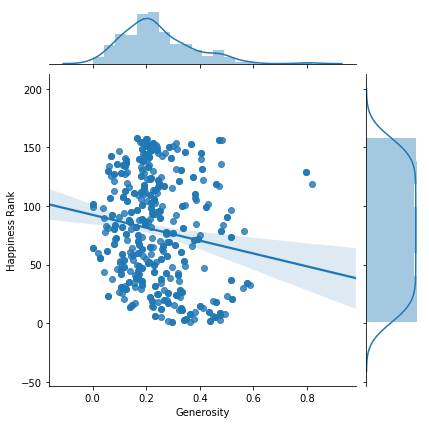

In [23]:
sns.jointplot('Generosity','Happiness Rank',data=data, kind = 'reg')

Hmm. Seems like there is no correlation between the happiness ranking and generosity

Let's visualize how many countries in each region

And visualize the distribution of the contribution of GDP/Capita to Happiness Scores

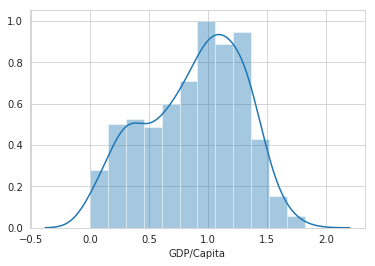

In [24]:
sns.set_style('whitegrid')
sns.distplot(data['GDP/Capita'])

In [25]:
data.set_index(['Region','Country'])

Happiness Rank  Happiness Score  \
Region                          Country                                        
Western Europe                  Switzerland               1            7.587   
                                Iceland                   2            7.561   
                                Denmark                   3            7.527   
                                Norway                    4            7.522   
North America                   Canada                    5            7.427   
...                                                     ...              ...   
Sub-Saharan Africa              Rwanda                  154            3.465   
                                Benin                   155            3.340   
Middle East and Northern Africa Syria                   156            3.006   
Sub-Saharan Africa              Burundi                 157            2.905   
                                Togo                    158            2.839   

                                             GDP/Capita   Family  \
Region                          Country                            
Western Europe                  Switzerland     1.39651  1.34951   
                                Iceland         1.30232  1.40223   
                                Denmark         1.32548  1.36058   
                                Norway          1.45900  1.33095   
North America                   Canada          1.32629  1.32261   
...                                                 ...      ...   
Sub-Saharan Africa              Rwanda          0.22208  0.77370   
                                Benin           0.28665  0.35386   
Middle East and Northern Africa Syria           0.66320  0.47489   
Sub-Saharan Africa              Burundi         0.01530  0.41587   
                                Togo            0.20868  0.13995   

                                             Health (Life Expectancy)  \
Region                          Country                                 
Western Europe                  Switzerland                   0.94143   
                                Iceland                       0.94784   
                                Denmark                       0.87464   
                                Norway                        0.88521   
North America                   Canada                        0.90563   
...                                                               ...   
Sub-Saharan Africa              Rwanda                        0.42864   
                                Benin                         0.31910   
Middle East and Northern Africa Syria                         0.72193   
Sub-Saharan Africa              Burundi                       0.22396   
                                Togo                          0.28443   

                                             Freedom  \
Region                          Country                
Western Europe                  Switzerland  0.66557   
                                Iceland      0.62877   
                                Denmark      0.64938   
                                Norway       0.66973   
North America                   Canada       0.63297   
...                                              ...   
Sub-Saharan Africa              Rwanda       0.59201   
                                Benin        0.48450   
Middle East and Northern Africa Syria        0.15684   
Sub-Saharan Africa              Burundi      0.11850   
                                Togo         0.36453   

                                             Trust (Government Corruption)  \
Region                          Country                                      
Western Europe                  Switzerland                        0.41978   
                                Iceland                            0.14145   
                                Denmark                            0.48357   
                                Norway            

In [26]:
data[['Region','GDP/Capita','Happiness Rank']].groupby(by='Region',as_index=False).mean().sort_values(by='GDP/Capita',ascending=False)

,Region,GDP/Capita,Happiness Rank
5,North America,1.398285,9.833333
9,Western Europe,1.338082,29.412698
0,Australia and New Zealand,1.328768,9.166667
2,Eastern Asia,1.193624,65.388889
4,Middle East and Northern Africa,1.090273,77.762712
1,Central and Eastern Europe,0.977471,78.816092
3,Latin America and Caribbean,0.917966,47.411765
6,Southeastern Asia,0.824830,80.814815
7,Southern Asia,0.593881,112.666667
8,Sub-Saharan Africa,0.410695,128.466102


Find out correlation between GDP/Capita and Happiness Rank

In [27]:
data[['GDP/Capita','Happiness Rank']].corr()

,GDP/Capita,Happiness Rank
GDP/Capita,1.000000,-0.782517
Happiness Rank,-0.782517,1.000000


There seems to be a strong negative correlation between GDP/Capita and Happiness Rank, which is not surprising. Let's visualize this relationship

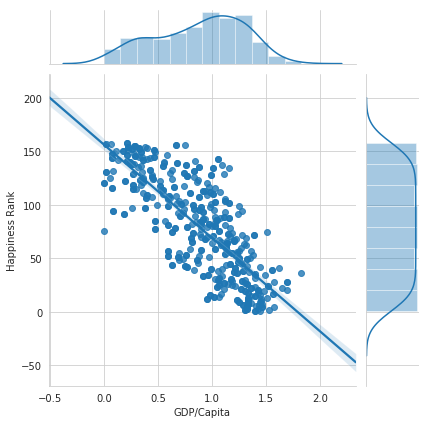

In [28]:
sns.jointplot('GDP/Capita','Happiness Rank',data=data, kind = 'reg')

Let's find the correlation between each feature compared to the happiness score using heatmap

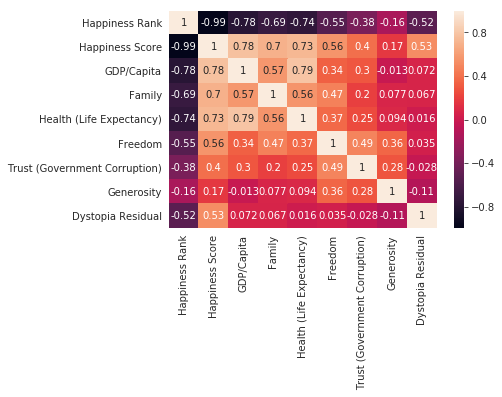

In [29]:
sns.heatmap(data.corr(),annot=True)

Now let's look at the correlation in each region. Let's start with Australia and New Zealand

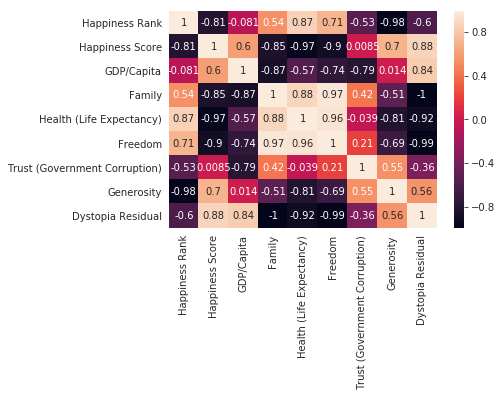

In [30]:
sns.heatmap(data[data['Region']=='Australia and New Zealand'].corr(),annot=True)

In Australia and New Zealand region, Generosity and Health are the most important factors to happiness. It is interesting how small GDP contributes to happiness. 

Now let's look at North America

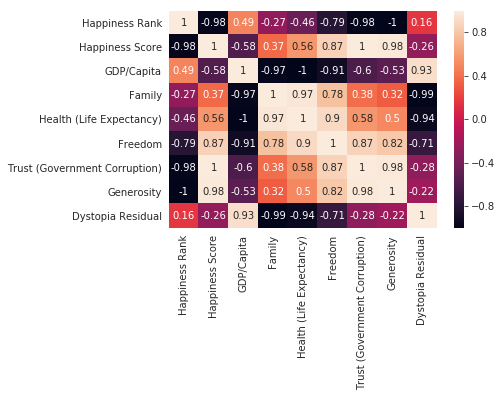

In [31]:
sns.heatmap(data[data['Region']=='North America'].corr(),annot=True)

Interestingly, Trust and Freedom are the 2 most important factors to happiness in North America. Family is the least significant factor here. This is not surprising considering North America value individuality

How about Western Europe?

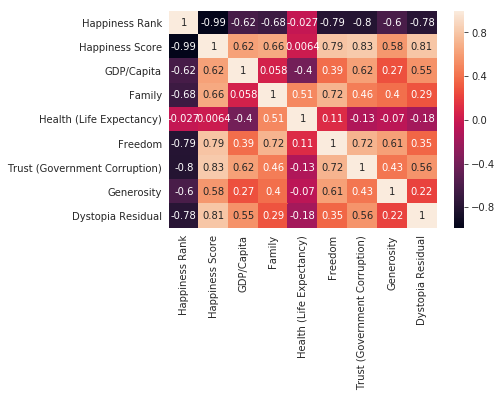

In [32]:
sns.heatmap(data[data['Region']=='Western Europe'].corr(),annot=True)

Trust, freedom are also the 2 most important factors. There also seem to be strong correlation with other factors such as generosity, family, GDP

Southeastern Asia would also be interesting to look at

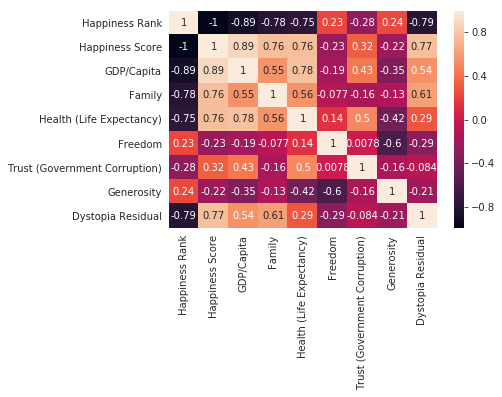

In [33]:
sns.heatmap(data[data['Region']=='Southeastern Asia'].corr(),annot=True)

Since many countries in Southeastern Asia are develop countries, it is not surprising that GDP is the most important factor. Other important factors are GDP, family, and health. Considering how much people here care about their family connection, it is understandable to see the significant of family to happiness here. It is also worthy to notice how insignificant freedom in this region compared to Western countries

Would be interesting to look at Middle East and Northern Africa region

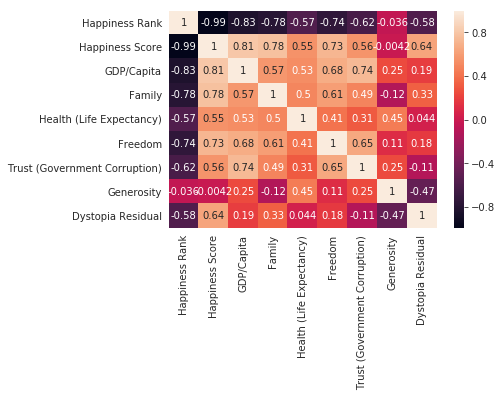

In [34]:
sns.heatmap(data[data['Region']=='Middle East and Northern Africa'].corr(),annot=True)

Let's be excited to look at Latin America and Caribbean

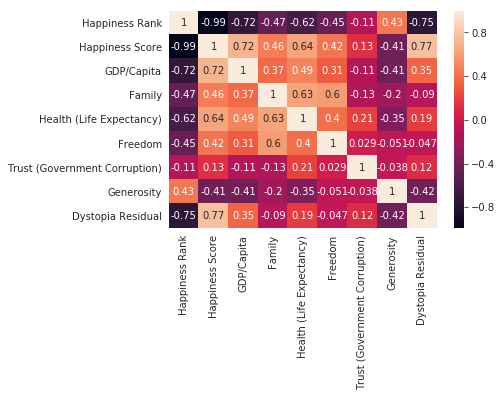

In [35]:
sns.heatmap(data[data['Region']=='Latin America and Caribbean'].corr(),annot=True)

On contrast to Western region such as North America or Western Europe, Trust, and Freedom the most insignificant factor to happiness. So fascinating how dinamic the change in the factors that contribute to happiness are in different countries

GDP is the most significant factor. Except generosity, many other factor also seem to contribute significantly to happiness of the population in this region. It is worthy to notice how insignificantly generosity is.

Let's look at the correlation between hapiness score and other features since that is what we care about.
* It is not surprising that there is a strong correlation between hapiness rank and hapiness score
* Ranking of features that is correlated to happiness score from highest to lowest:
 1. GDP/Capita
 2. Health
 3. Family
 4. Freedom
 5. Dystopia Residual
 6. Trust
 7. Generosity
The 3 most significant factors are money, health, and family. That sounds right. 

Let's compare the data from 3 different years and evaluate the change in hapiness ranking of a country over time

In [36]:
df = data_15
df_1=pd.merge(df,data_16,on='Country')
df_1 = df_1[['Country','Happiness Rank_x','Happiness Score_x','Happiness Rank_y', 'Happiness Score_y']]

df_1

,Country,Happiness Rank_x,Happiness Score_x,Happiness Rank_y,Happiness Score_y
0,Switzerland,1,7.587,2,7.509
1,Iceland,2,7.561,3,7.501
2,Denmark,3,7.527,1,7.526
3,Norway,4,7.522,4,7.498
4,Canada,5,7.427,6,7.404
...,...,...,...,...,...
146,Rwanda,154,3.465,152,3.515
147,Benin,155,3.340,153,3.484
148,Syria,156,3.006,156,3.069
149,Burundi,157,2.905,157,2.905


In [37]:
df_1['Difference in rank'] = df_1['Happiness Rank_x'].sub(df_1['Happiness Rank_y'])
df_1['Difference in score'] = df_1['Happiness Score_x'].sub(df_1['Happiness Score_y'])
df_1

,Country,Happiness Rank_x,Happiness Score_x,Happiness Rank_y,Happiness Score_y,Difference in rank,Difference in score
0,Switzerland,1,7.587,2,7.509,-1,0.078
1,Iceland,2,7.561,3,7.501,-1,0.060
2,Denmark,3,7.527,1,7.526,2,0.001
3,Norway,4,7.522,4,7.498,0,0.024
4,Canada,5,7.427,6,7.404,-1,0.023
...,...,...,...,...,...,...,...
146,Rwanda,154,3.465,152,3.515,2,-0.050
147,Benin,155,3.340,153,3.484,2,-0.144
148,Syria,156,3.006,156,3.069,0,-0.063
149,Burundi,157,2.905,157,2.905,0,0.000


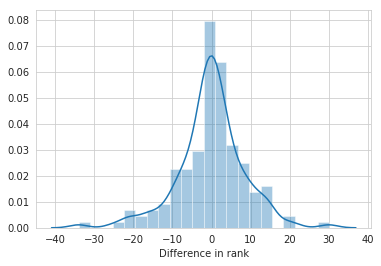

In [38]:
sns.distplot(df_1['Difference in rank'])

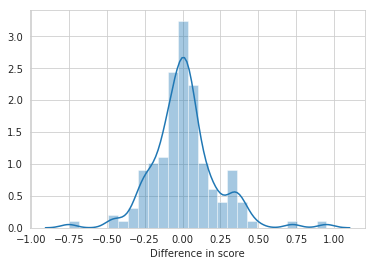

In [39]:
sns.distplot(df_1['Difference in score'])

In [40]:
df_1['Difference in rank'].describe()

count    151.000000
mean      -0.152318
std        8.635391
min      -34.000000
25%       -4.000000
50%        0.000000
75%        4.000000
max       30.000000
Name: Difference in rank, dtype: float64

In [41]:
df_1['Difference in score'].describe()

count    151.000000
mean       0.010384
std        0.213667
min       -0.750000
25%       -0.093500
50%        0.000000
75%        0.085000
max        0.949000
Name: Difference in score, dtype: float64

The majority of difference in rank and score of data from 2015 and 2016 is at 0. This indicates that the rank and the score tends to be consistent from 2015 to 2016. 
Let's find out which countries have a signicant decrease in its rank

In [42]:
df_1[df_1['Difference in rank']>10][['Country','Happiness Rank_x','Happiness Rank_y','Difference in rank']].sort_values(by='Difference in rank',ascending=False)

,Country,Happiness Rank_x,Happiness Rank_y,Difference in rank
66,Algeria,68,38,30
87,Latvia,89,68,21
126,Cameroon,133,114,19
84,Romania,86,71,15
125,Sri Lanka,132,117,15
128,Egypt,135,120,15
59,Malaysia,61,47,14
115,Nepal,121,107,14
135,Senegal,142,128,14
98,Hungary,104,91,13


13 countries with the increase in rank ranging from 12-30 in one year.

Now let's observe the countries with the significant increase in rank from 2015 to 2016

In [43]:
df_1[df_1['Difference in rank']<-10][['Country','Happiness Rank_x','Happiness Rank_y','Difference in rank']].sort_values(by='Difference in rank')

,Country,Happiness Rank_x,Happiness Rank_y,Difference in rank
110,Liberia,116,150,-34
76,Nigeria,78,103,-25
21,Venezuela,23,44,-21
73,Vietnam,75,96,-21
83,Zambia,85,106,-21
51,Paraguay,53,70,-17
113,Haiti,119,136,-17
109,Zimbabwe,115,131,-16
112,Sudan,118,133,-15
91,Albania,95,109,-14
